In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Changed encoding to allow reading in Jupyter Notebook.
# Skipped first two rows as they couldn't be read, third row was the header row for the data.
unis_adults = pd.read_csv('Resources/uninsured-adults-all-01-30-2024.csv', skiprows=2, encoding='cp1252')
# Reviewing first 15 rows
unis_adults.head(15)

,time_period,state,population,cohort,point_estimate
0,2012,United States,all,All,20.8
1,2013,United States,all,All,20.4
2,2014,United States,all,All,16.3
3,2015,United States,all,All,13.2
4,2016,United States,all,All,12.1
5,2017,United States,all,All,12.2
6,2018,United States,all,All,12.4
7,2019,United States,all,All,12.9
8,2020,United States,all,All,12.4
9,2021,United States,all,All,12.1


In [3]:
# Reading in premature avoidable deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
avoi_deaths = pd.read_csv('Resources/premature-avoidable-deaths-per-100,000-population-all-01-25-2024.csv', skiprows=2, encoding='cp1252')
avoi_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,250.1
1,2019-20,United States,all,All,276.7
2,2020-21,United States,all,All,320.8
3,2018-19,Alabama,all,All,321.2
4,2019-20,Alabama,all,All,351.0
5,2020-21,Alabama,all,All,417.9
6,2018-19,Alaska,all,All,261.7
7,2019-20,Alaska,all,All,282.4
8,2020-21,Alaska,all,All,342.3
9,2018-19,Arizona,all,All,249.3


In [4]:
# Reading in preventable deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
prev_deaths = pd.read_csv('Resources/premature-deaths-from-preventable-causes-per-100,000-population-all-01-29-2024.csv', skiprows=2, encoding='cp1252')
prev_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,166.3
1,2019-20,United States,all,All,190.8
2,2020-21,United States,all,All,231.9
3,2018-19,Alabama,all,All,212.6
4,2019-20,Alabama,all,All,241.0
5,2020-21,Alabama,all,All,302.4
6,2018-19,Alaska,all,All,193.9
7,2019-20,Alaska,all,All,209.4
8,2020-21,Alaska,all,All,262.2
9,2018-19,Arizona,all,All,173.2


In [5]:
# Reading in premature deaths per 100,000 population per state.
# Skipping first two rows, fixed encoding
treat_deaths = pd.read_csv('Resources/premature-deaths-from-treatable-causes-per-100,000-population-all-01-29-2024.csv', skiprows=2, encoding='cp1252')
treat_deaths.head(15)

,time_period,state,population,cohort,point_estimate
0,2018-19,United States,all,All,83.8
1,2019-20,United States,all,All,85.9
2,2020-21,United States,all,All,88.8
3,2018-19,Alabama,all,All,108.5
4,2019-20,Alabama,all,All,110.0
5,2020-21,Alabama,all,All,115.6
6,2018-19,Alaska,all,All,67.9
7,2019-20,Alaska,all,All,73.1
8,2020-21,Alaska,all,All,80.1
9,2018-19,Arizona,all,All,76.1


In [6]:
# Creating variable for the column we want to narrow focus based on
column_name = 'time_period'
# Count the rows where the value in the specified column is '2019'
count_2019 = (unis_adults[column_name] == 2019).sum()
# Confirming row counts per data set
print(f"The number of rows with the value '2019' in {column_name} is: {count_2019} in unis_adults")
count_avoi1819 = (avoi_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_avoi1819} in avoi_deaths")
count_prev1819 = (prev_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_prev1819} in prev_deaths")
count_tre1819 = (treat_deaths[column_name] == "2018-19").sum()
print(f"The number of rows with the value '2018-19' in {column_name} is: {count_tre1819} in treat_deaths")
# NOTE: It is 52 rather than 50 because the data sets contain 50 states + District of Columbia + + United States (likely averages)

The number of rows with the value '2019' in time_period is: 52 in unis_adults
The number of rows with the value '2018-19' in time_period is: 52 in avoi_deaths
The number of rows with the value '2018-19' in time_period is: 52 in prev_deaths
The number of rows with the value '2018-19' in time_period is: 52 in treat_deaths


In [7]:
# Filtering down to only rows with the values of 2018 or 2019 in the column "time_period"
census_1819_df = pd.DataFrame(unis_adults.loc[(unis_adults["time_period"] == 2019) | (unis_adults["time_period"] == 2018)]).reset_index()
census_1819_df.head(7)

,index,time_period,state,population,cohort,point_estimate
0,6,2018,United States,all,All,12.4
1,7,2019,United States,all,All,12.9
2,16,2018,Alabama,all,All,15.6
3,17,2019,Alabama,all,All,14.9
4,26,2018,Alaska,all,All,15.9
5,27,2019,Alaska,all,All,15.3
6,36,2018,Arizona,all,All,14.6


In [8]:
# Uninsured adults information
# The uninsured adults were separated by year whereas the rest of the data spans 2 years (2018-19)
# So we took 2018 and 2019 data and averaged it
unis_clean_1819 = census_1819_df.groupby("state")["point_estimate"].mean().reset_index()
# unis_clean_1819["point_estimate" == "Average rate of uninsured"]
# Display the resulting DataFrame
unis_clean_1819.head()

,state,point_estimate
0,Alabama,15.25
1,Alaska,15.60
2,Arizona,15.00
3,Arkansas,12.70
4,California,10.55


In [9]:
#Renaming of columns and verifying change
census_1819_df = census_1819_df.rename(columns={"point_estimate": "Percentage of Uninsured Adults",
                                    "index": "Index", "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
census_1819_df.head()

,Index,Years,State,Population,Cohort,Percentage of Uninsured Adults
0,6,2018,United States,all,All,12.4
1,7,2019,United States,all,All,12.9
2,16,2018,Alabama,all,All,15.6
3,17,2019,Alabama,all,All,14.9
4,26,2018,Alaska,all,All,15.9


In [10]:
#Renaming of columns and verifying change
avoi_deaths_df = avoi_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
avoi_deaths_df.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,250.1
1,2019-20,United States,all,All,276.7
2,2020-21,United States,all,All,320.8
3,2018-19,Alabama,all,All,321.2
4,2019-20,Alabama,all,All,351.0


In [11]:
#Renaming of columns and verifying change
prev_deaths = prev_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
prev_deaths.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,166.3
1,2019-20,United States,all,All,190.8
2,2020-21,United States,all,All,231.9
3,2018-19,Alabama,all,All,212.6
4,2019-20,Alabama,all,All,241.0


In [12]:
#Renaming of columns and verifying change
treat_deaths = treat_deaths.rename(columns={"point_estimate": "Deaths per 100k Population",
                                    "time_period": "Years", "state": "State", "population": "Population", "cohort": "Cohort"})
treat_deaths.head()

,Years,State,Population,Cohort,Deaths per 100k Population
0,2018-19,United States,all,All,83.8
1,2019-20,United States,all,All,85.9
2,2020-21,United States,all,All,88.8
3,2018-19,Alabama,all,All,108.5
4,2019-20,Alabama,all,All,110.0


In [13]:
unis_clean_1819 = census_1819_df.groupby("State")["Percentage of Uninsured Adults"].mean().reset_index()

# Display the resulting DataFrame
unis_clean_1819.tail(15)

,State,Percentage of Uninsured Adults
37,Oregon,10.25
38,Pennsylvania,7.70
39,Rhode Island,5.85
40,South Carolina,15.85
41,South Dakota,13.50
42,Tennessee,14.80
43,Texas,24.20
44,United States,12.65
45,Utah,11.85
46,Vermont,6.10


In [14]:
# Drop a row in place
unis_clean_1819.drop(unis_clean_1819.index[44], inplace=True)
unis_clean_1819.tail(10)

,State,Percentage of Uninsured Adults
41,South Dakota,13.50
42,Tennessee,14.80
43,Texas,24.20
45,Utah,11.85
46,Vermont,6.10
47,Virginia,11.65
48,Washington,9.45
49,West Virginia,9.60
50,Wisconsin,7.85
51,Wyoming,15.80


In [15]:
# Limiting the data to 2018-19 (2 year period) per state (avoidable deaths)
avoi_deaths_narrow = avoi_deaths_df.loc[avoi_deaths_df["Years"]=="2018-19"].reset_index()
avoi_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,250.1
1,3,2018-19,Alabama,all,All,321.2
2,6,2018-19,Alaska,all,All,261.7
3,9,2018-19,Arizona,all,All,249.3
4,12,2018-19,Arkansas,all,All,351.0


In [16]:
# Creating the df by choosing only the columns we want to keep (avoidable deaths)
# Resetting index
avoi_deaths_df = avoi_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
avoi_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,250.1
1,2018-19,Alabama,321.2
2,2018-19,Alaska,261.7
3,2018-19,Arizona,249.3
4,2018-19,Arkansas,351.0


In [17]:
# Drop a row in place
avoi_deaths_df.drop(avoi_deaths.index[0], inplace=True)
avoi_deaths_df.head()

C:\Users\19ebe\AppData\Local\Temp\ipykernel_38888\1002979812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avoi_deaths_df.drop(avoi_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,321.2
2,2018-19,Alaska,261.7
3,2018-19,Arizona,249.3
4,2018-19,Arkansas,351.0
5,2018-19,California,203.8


In [18]:
# Limiting the data to 2018-19 (2 year period) per state (preventable deaths)
prev_deaths_narrow = prev_deaths.loc[prev_deaths["Years"]=="2018-19"].reset_index()
prev_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,166.3
1,3,2018-19,Alabama,all,All,212.6
2,6,2018-19,Alaska,all,All,193.9
3,9,2018-19,Arizona,all,All,173.2
4,12,2018-19,Arkansas,all,All,229.3


In [19]:
# Creating the df by choosing only the columns we want to keep (preventable deaths)
# Resetting index
prev_deaths_df = prev_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
prev_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,166.3
1,2018-19,Alabama,212.6
2,2018-19,Alaska,193.9
3,2018-19,Arizona,173.2
4,2018-19,Arkansas,229.3


In [20]:
# Drop a row in place
prev_deaths_df.drop(prev_deaths.index[0], inplace=True)
prev_deaths_df.head()

C:\Users\19ebe\AppData\Local\Temp\ipykernel_38888\1946220576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_deaths_df.drop(prev_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,212.6
2,2018-19,Alaska,193.9
3,2018-19,Arizona,173.2
4,2018-19,Arkansas,229.3
5,2018-19,California,133.1


In [21]:
# Limiting the data to 2018-19 (2 year period) per state (treatable deaths)
treat_deaths_narrow = treat_deaths.loc[treat_deaths["Years"]=="2018-19"].reset_index()
treat_deaths_narrow.head()

,index,Years,State,Population,Cohort,Deaths per 100k Population
0,0,2018-19,United States,all,All,83.8
1,3,2018-19,Alabama,all,All,108.5
2,6,2018-19,Alaska,all,All,67.9
3,9,2018-19,Arizona,all,All,76.1
4,12,2018-19,Arkansas,all,All,121.7


In [22]:
# Creating the df by choosing only the columns we want to keep (treatable deaths)
# Resetting index
treat_deaths_df = treat_deaths_narrow[["Years", "State", "Deaths per 100k Population"]]
treat_deaths_df.head()

,Years,State,Deaths per 100k Population
0,2018-19,United States,83.8
1,2018-19,Alabama,108.5
2,2018-19,Alaska,67.9
3,2018-19,Arizona,76.1
4,2018-19,Arkansas,121.7


In [23]:
# Drop a row in place
treat_deaths_df.drop(treat_deaths.index[0], inplace=True)
treat_deaths_df.head()

C:\Users\19ebe\AppData\Local\Temp\ipykernel_38888\1708164680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat_deaths_df.drop(treat_deaths.index[0], inplace=True)


,Years,State,Deaths per 100k Population
1,2018-19,Alabama,108.5
2,2018-19,Alaska,67.9
3,2018-19,Arizona,76.1
4,2018-19,Arkansas,121.7
5,2018-19,California,70.8


In [24]:
unis_clean_1819.describe()

,Percentage of Uninsured Adults
count,51.000000
mean,11.609804
std,4.407358
min,4.100000
25%,8.300000
50%,11.300000
75%,14.900000
max,24.200000


In [25]:
avoi_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,260.709804
std,51.413665
min,185.900000
25%,222.050000
50%,252.200000
75%,295.600000
max,385.600000


In [26]:
prev_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,176.349020
std,34.608296
min,126.400000
25%,151.900000
50%,173.200000
75%,199.850000
max,269.000000


In [27]:
treat_deaths_df.describe()

,Deaths per 100k Population
count,51.000000
mean,84.354902
std,18.685335
min,59.500000
25%,70.050000
50%,80.800000
75%,95.200000
max,137.500000


In [28]:
variance_unis_clean = unis_clean_1819['Percentage of Uninsured Adults'].var()
variance_unis_clean

19.424801960784308

In [29]:
std_deviation_unis_clean = unis_clean_1819['Percentage of Uninsured Adults'].std()
std_deviation_unis_clean

4.407357707378005

In [30]:
# At this point we have:
# unis_clean_1819 - the average of 2018 and 2019 uninsured persons per state
# Three additional dataframes regarding deaths: avoi_deaths_df, prev_deaths_df, treat_deaths_df
# all of them broken down by state and 2018-19
# Now we need to determine how to do the statistical analysis

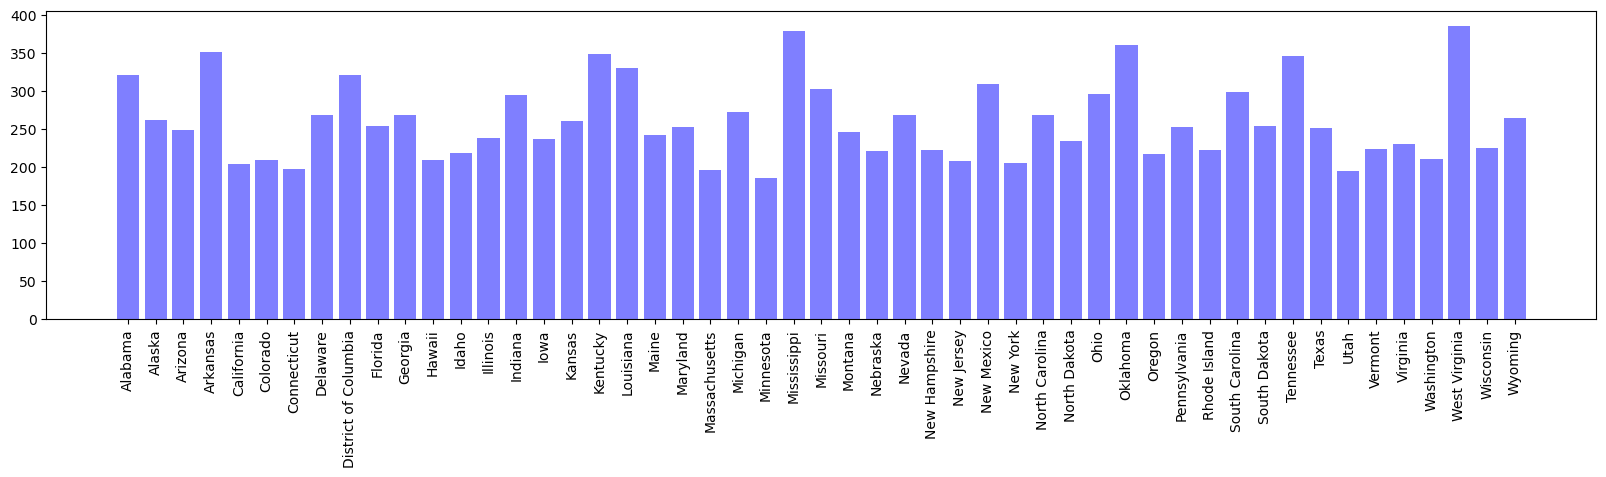

In [31]:
x_axis = np.arange(len(avoi_deaths_df))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_deaths_df["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_deaths_df["State"], rotation="vertical")
plt.show()

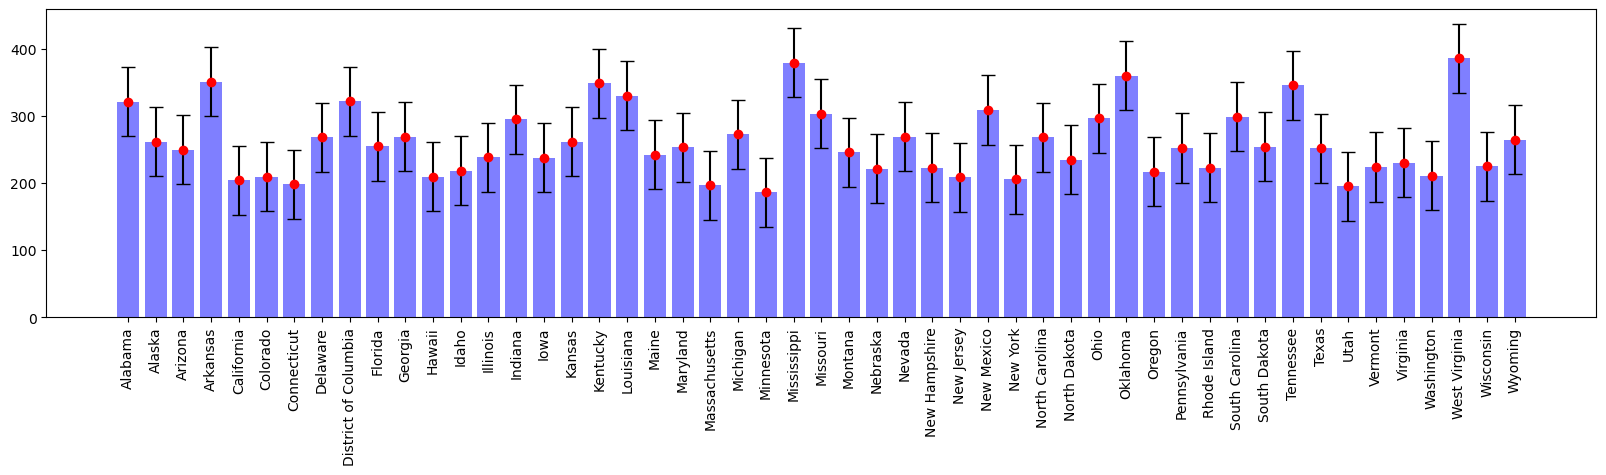

In [32]:
# This one is NOT correct yet - playing with the idea of standard deviation bars - currently it's not doing standard deviation from the average
# std_dev = avoi_deaths_df['Deaths per 100k Population'].std()

# x_axis = np.arange(len(avoi_deaths_df))
# tick_locations = [State for State in x_axis]
# plt.figure(figsize=(20,4))
# plt.bar(x_axis, avoi_deaths_df["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, avoi_deaths_df["State"], rotation="vertical")
# plt.errorbar(avoi_deaths_df['State'], avoi_deaths_df['Deaths per 100k Population'], yerr=std_dev, fmt='o', color='r', ecolor='black', capsize=5)
# plt.show()

In [33]:
# Sort the data set high to low 
avoi_deaths_df_sorted = avoi_deaths_df.sort_values("Deaths per 100k Population")
avoi_deaths_df_sorted.head()


,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,185.9
45,2018-19,Utah,195.4
22,2018-19,Massachusetts,196.5
7,2018-19,Connecticut,197.9
5,2018-19,California,203.8


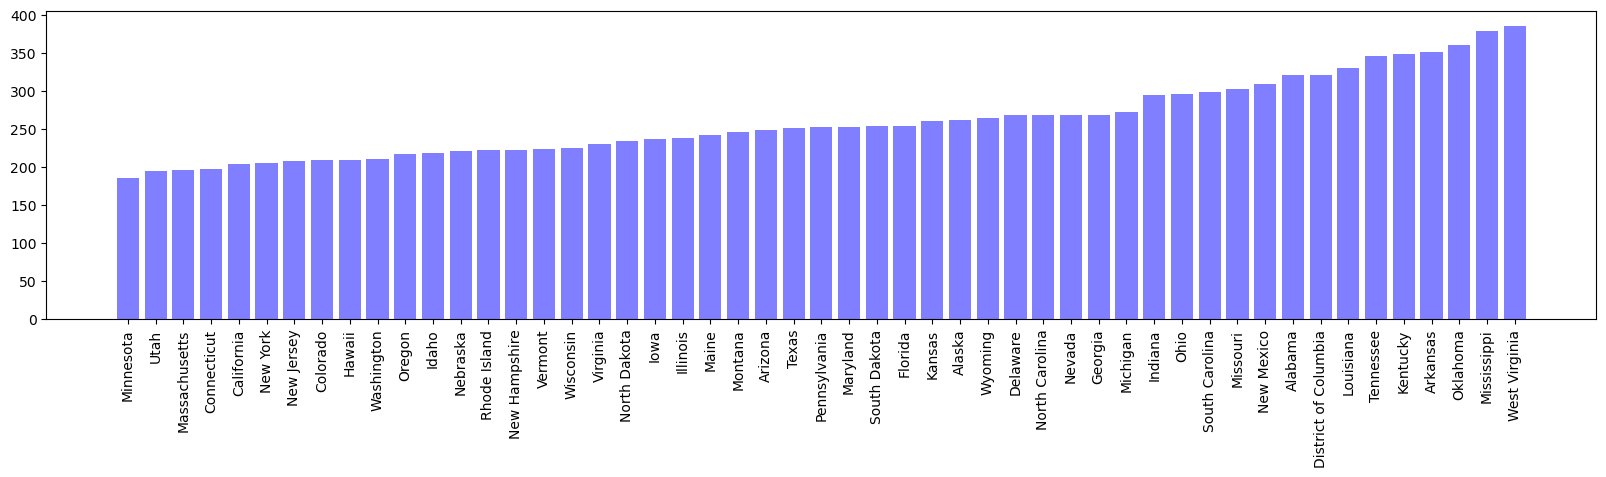

In [35]:
x_axis = np.arange(len(avoi_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_deaths_df_sorted["State"], rotation="vertical")
plt.show()

In [38]:
# Sort the data set high to low 
unis_clean_1819_sorted = unis_clean_1819.sort_values("Percentage of Uninsured Adults")
unis_clean_1819_sorted.head()

,State,Percentage of Uninsured Adults
21,Massachusetts,4.10
8,District of Columbia,4.20
11,Hawaii,5.75
39,Rhode Island,5.85
46,Vermont,6.10


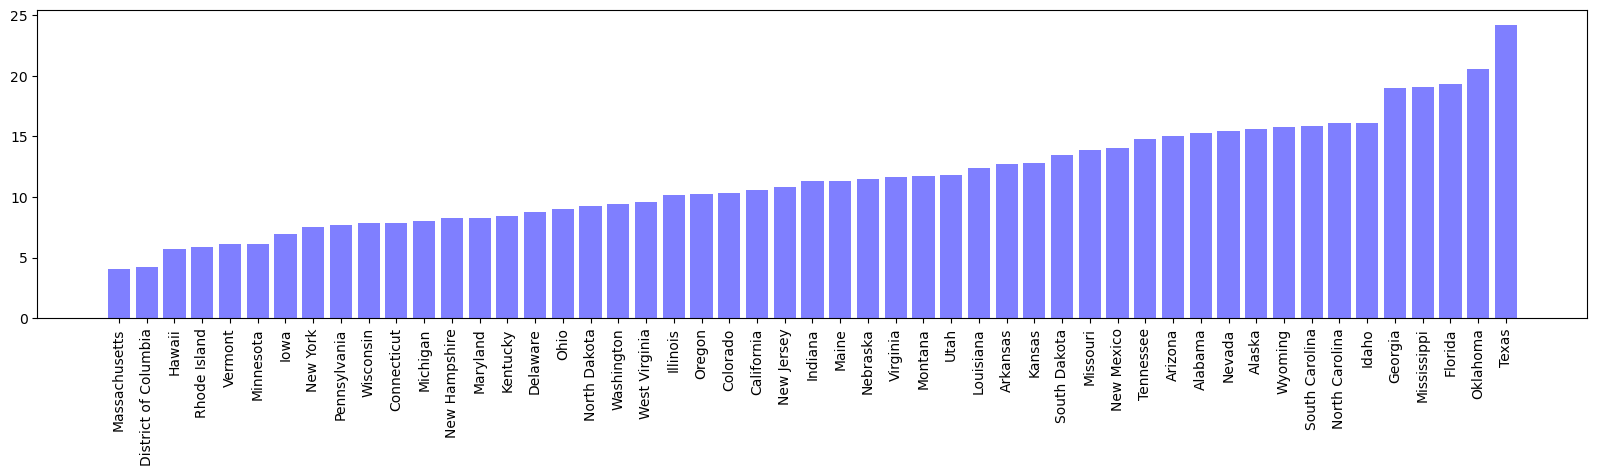

In [40]:
x_axis = np.arange(len(unis_clean_1819_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, unis_clean_1819_sorted["Percentage of Uninsured Adults"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, unis_clean_1819_sorted["State"], rotation="vertical")
plt.show()

In [42]:
# Sort the data set high to low 
treat_deaths_df_sorted = treat_deaths_df.sort_values("Deaths per 100k Population")
treat_deaths_df_sorted.head()

,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,59.5
22,2018-19,Massachusetts,59.6
6,2018-19,Colorado,61.0
7,2018-19,Connecticut,62.0
46,2018-19,Vermont,62.2


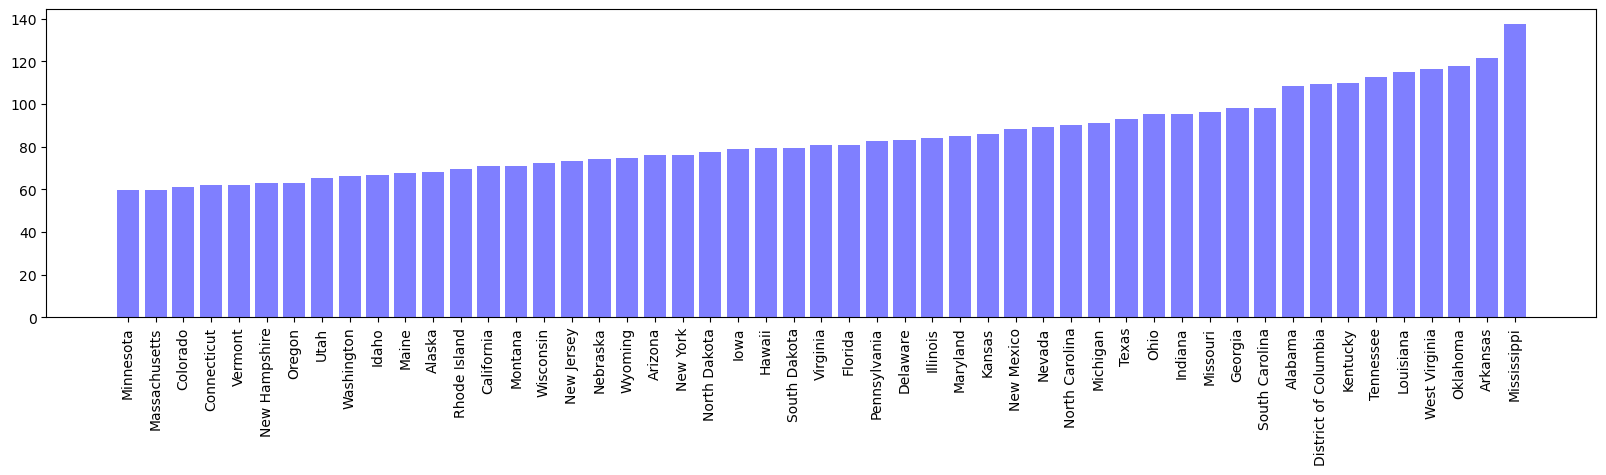

In [43]:
x_axis = np.arange(len(treat_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, treat_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, treat_deaths_df_sorted["State"], rotation="vertical")
plt.show()

In [46]:
# Sort the data set high to low 
prev_deaths_df_sorted = prev_deaths_df.sort_values("Deaths per 100k Population")
prev_deaths_df_sorted.head()

,Years,State,Deaths per 100k Population
24,2018-19,Minnesota,126.4
33,2018-19,New York,129.1
45,2018-19,Utah,130.1
12,2018-19,Hawaii,130.2
5,2018-19,California,133.1


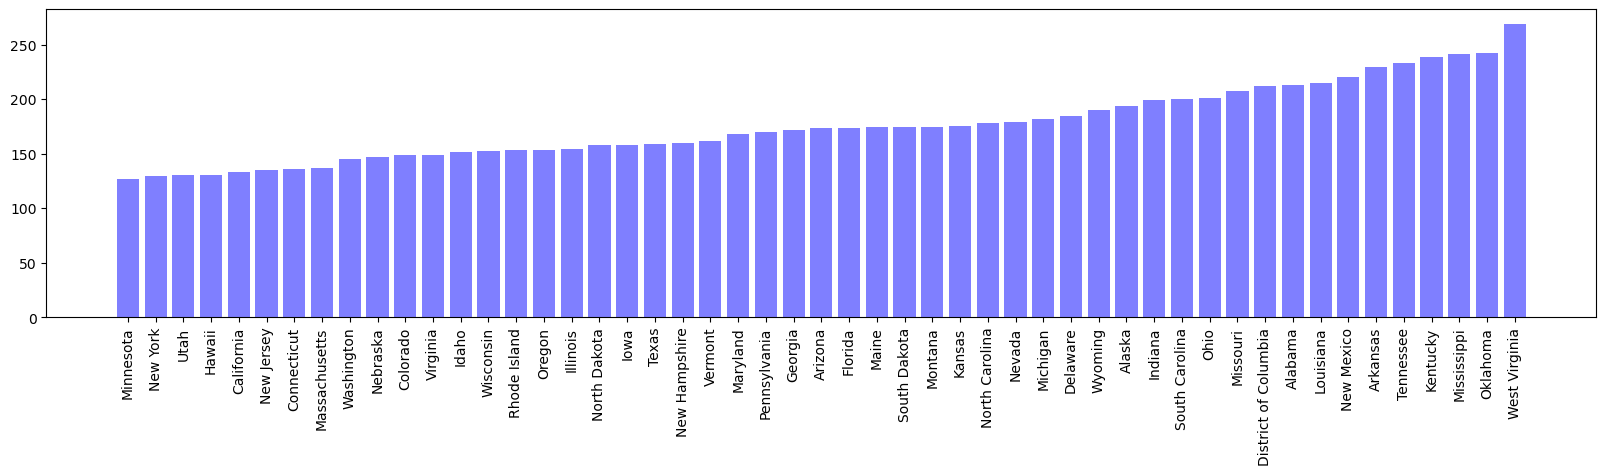

In [47]:
x_axis = np.arange(len(prev_deaths_df_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, prev_deaths_df_sorted["Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, prev_deaths_df_sorted["State"], rotation="vertical")
plt.show()